Proyecto ventas BMW

In [8]:
#Importaremos las librerias que utilizaremos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
#Cargamos el dataset
df = pd.read_csv(r"C:\Users\danny\OneDrive\Documentos\proyects data\BMW SALES\BMW sales data (2010-2024) (1).csv")
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [10]:
#Damos un vistazo inicial al dataset
print(df.info())
print()
print(df.describe())
print()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB
None

               Year  Engine_Size_L     Mileage_KM      Price_USD  Sales_Volume
count  50000.000000   50000.000000   50000.000000   50000.000000  50000.000000
me

In [11]:
#Creamos una lista que recorreremos con un ciclo for para obtener distintas metricas
numeric_cols = ['Year', 'Engine_Size_L', 'Mileage_KM', 'Price_USD', 'Sales_Volume']

for col in numeric_cols:
    print(f'{col} - Mean: {df[col].mean():2f}, Sum: {df[col].sum()}, Range: {df[col].max() - df[col].min()}')

Year - Mean: 2017.015700, Sum: 100850785, Range: 14
Engine_Size_L - Mean: 3.247180, Sum: 162359.0, Range: 3.5
Mileage_KM - Mean: 100307.203140, Sum: 5015360157, Range: 199993
Price_USD - Mean: 75034.600900, Sum: 3751730045, Range: 89998
Sales_Volume - Mean: 5067.514680, Sum: 253375734, Range: 9899


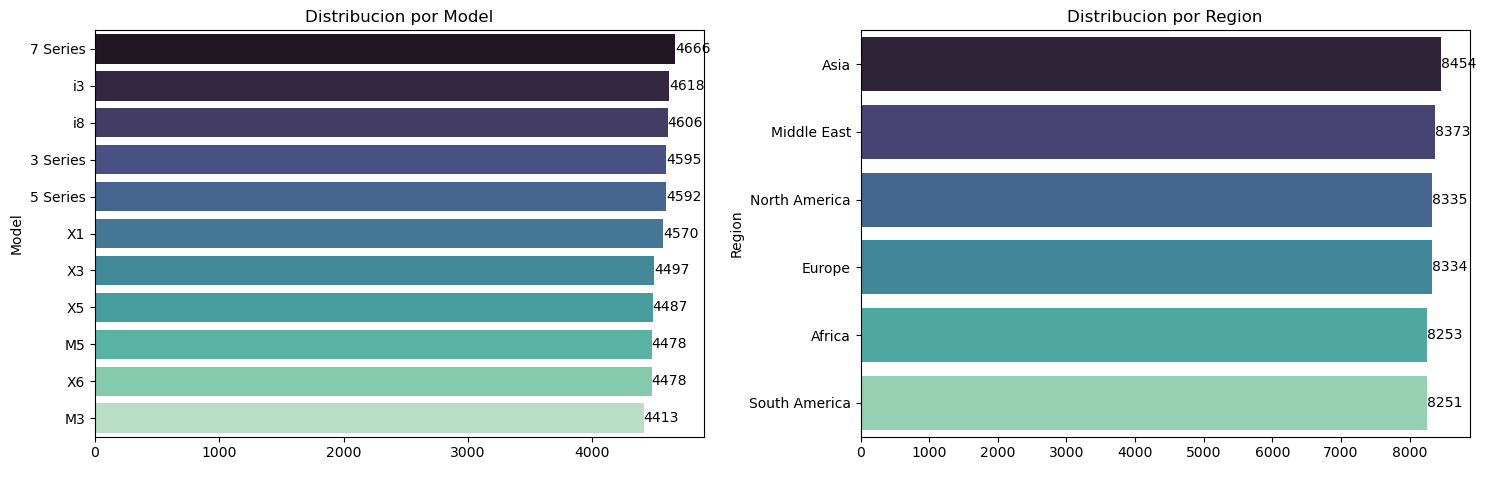

In [12]:
#Comenzaremos con la visualizacion de datos
categorical_cols = ['Model', 'Region'] 
plt.figure(figsize=(15,5)) 
for i, col in enumerate(categorical_cols): 
    plt.subplot(1, 2, i + 1) 
    ax = sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='mako') 
    plt.title(f'Distribucion por {col}') 
    plt.xlabel(' ') 
    plt.ylabel(col) 
    for p in ax.patches: 
        width = p.get_width() 
        plt.text(width, p.get_y() + p.get_height()/2., '{:1.0f}'.format(width), ha='left', va='center') 
        
plt.tight_layout() 
plt.show()

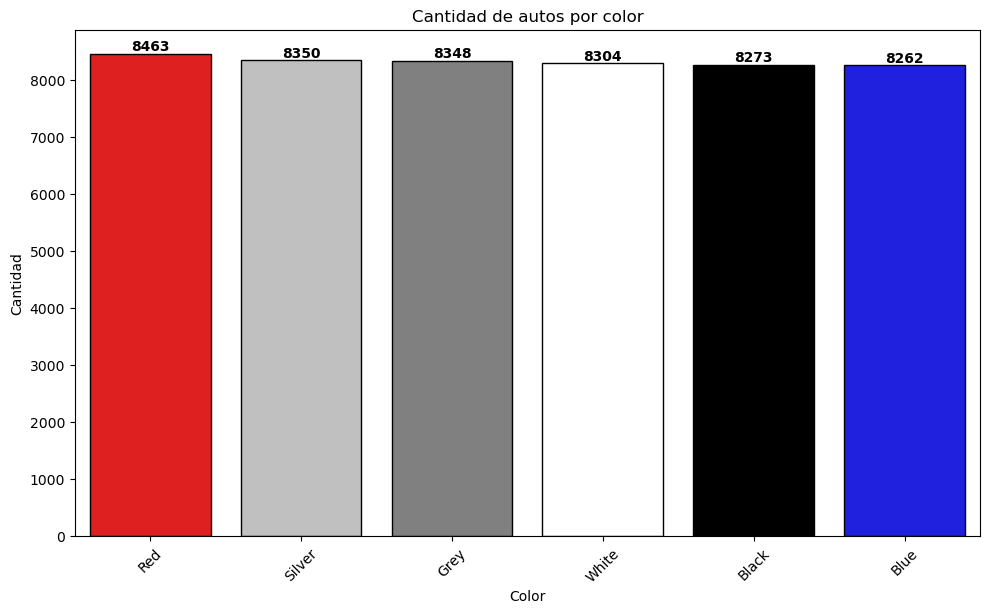

In [13]:
#Grafico que nos mostrara la distribucion por colores
plt.figure(figsize=(10,6))
order = df['Color'].value_counts().index

color_map= {
    "Red": "red",
    "Blue": "blue",
    "Black": "black",
    "White": "white",
    "Silver": "silver",
    "Gray": "gray",
    "Green": "green",
    "Yellow": "yellow"
}
bar_colors= [color_map.get(c, 'gray') for c in order]

ax = sns.countplot(
    data = df,
    x='Color',
    order=order,
    palette= bar_colors,
    edgecolor='black',
    linewidth=1 
)

for p in ax.patches:
    height= int(p.get_height())
    ax.annotate(
        f'{height}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize= 10,
        fontweight= 'bold'
    )
    
plt.title('Cantidad de autos por color')
plt.xlabel('Color')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

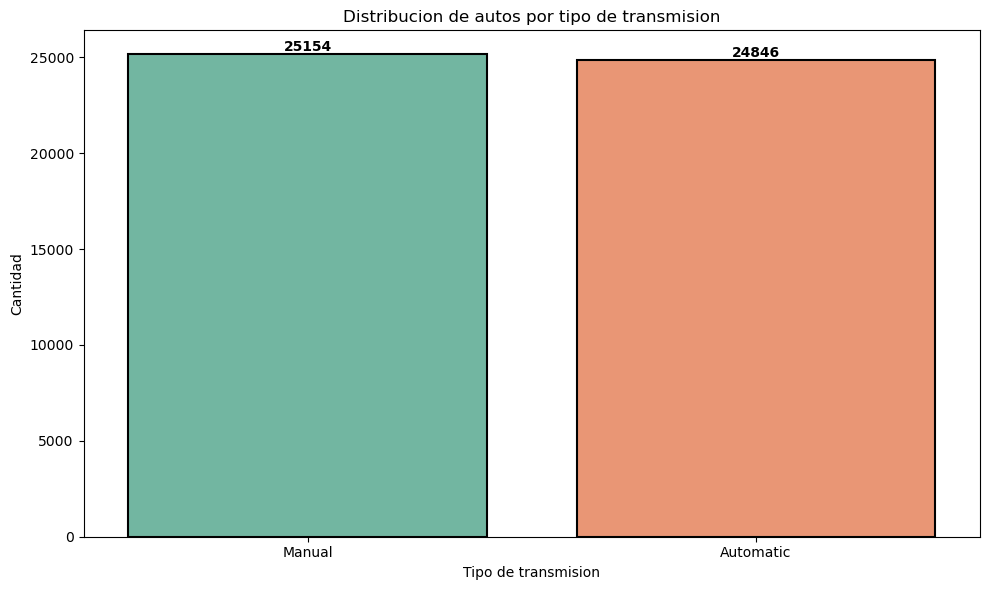

In [14]:
#Grafico que nos mostrara la distribucion por tipo de transmision
plt.figure(figsize=(10,6))

order = df["Transmission"].value_counts().index
palette = 'Set2'

ax = sns.countplot(
    data = df,
    x='Transmission',
    hue='Transmission',
    order=order,
    palette=palette,
    edgecolor='black',
    linewidth=1.5
)

for p in ax.patches:
    height = int(p.get_height())
    ax.annotate(
        f'{height}',
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
    )

plt.title('Distribucion de autos por tipo de transmision')
plt.xlabel('Tipo de transmision')
plt.ylabel('Cantidad')
plt.tight_layout()
plt.show()

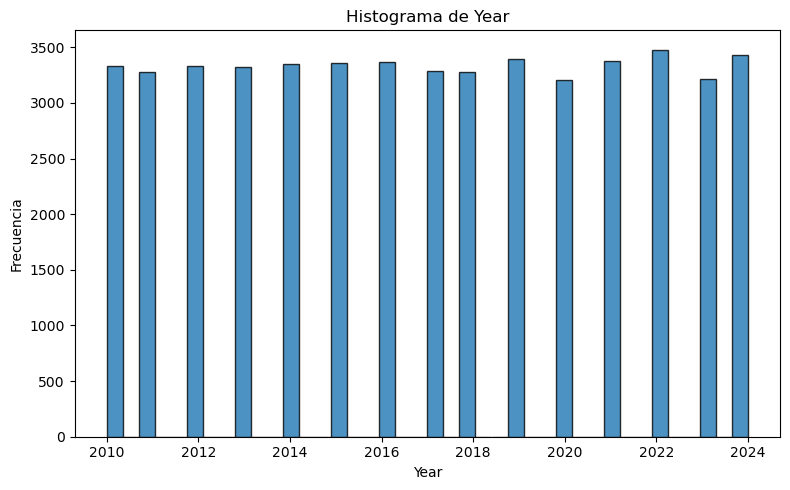

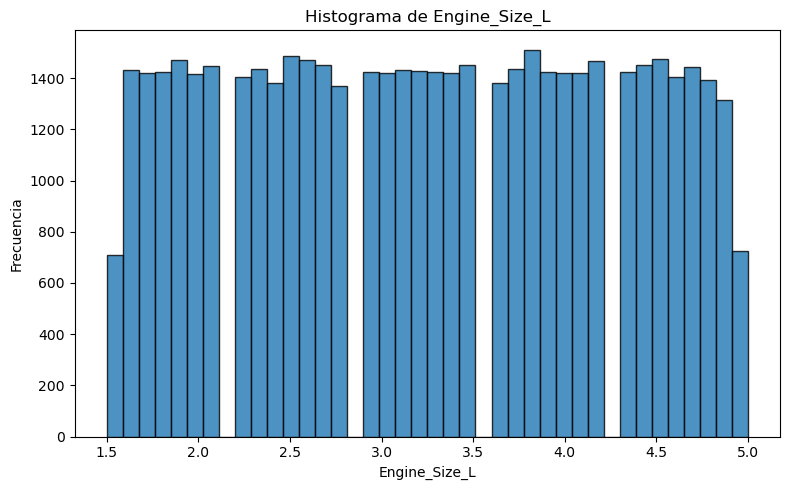

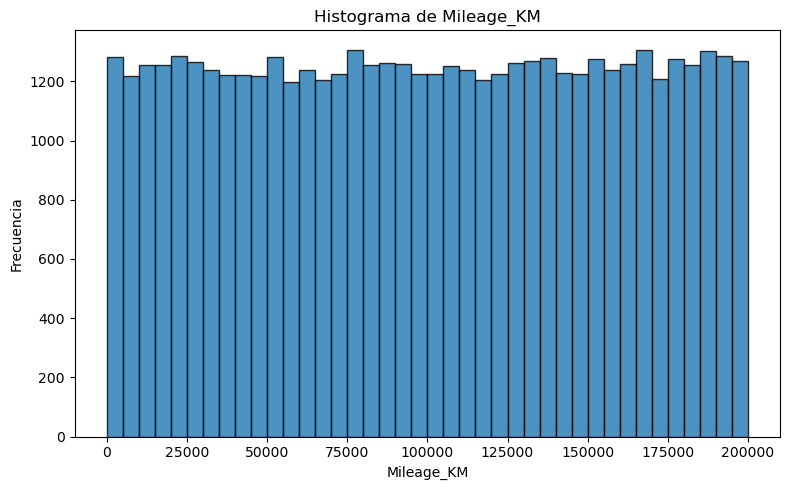

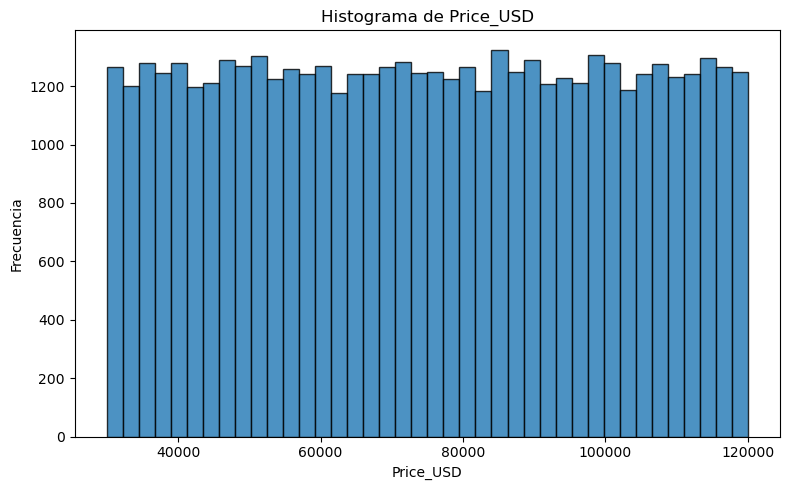

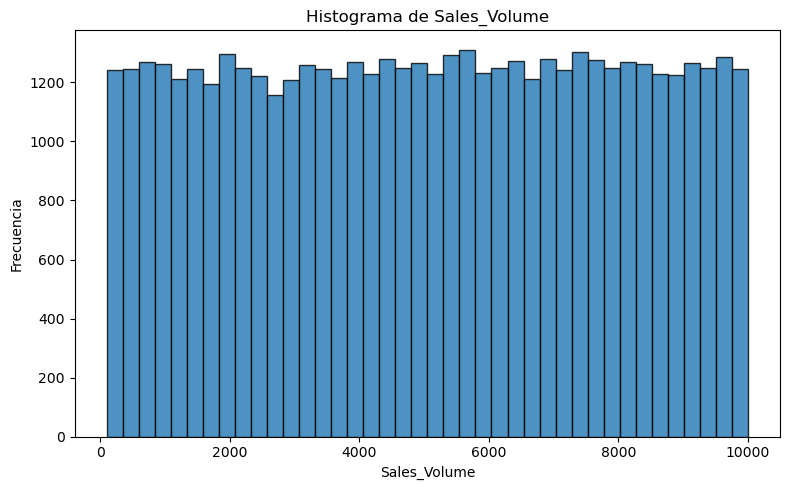

In [15]:
#Histogramas para dar un vistazo a las columnas numericas
numeric_cols = df.select_dtypes(include=['number']).columns

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plt.hist(
        df[col].dropna(),
        bins=40,        # más divisiones → forma más clara
        alpha=0.8,       # un poco de transparencia para suavizar
        edgecolor='black',
        linewidth=1
    )
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()

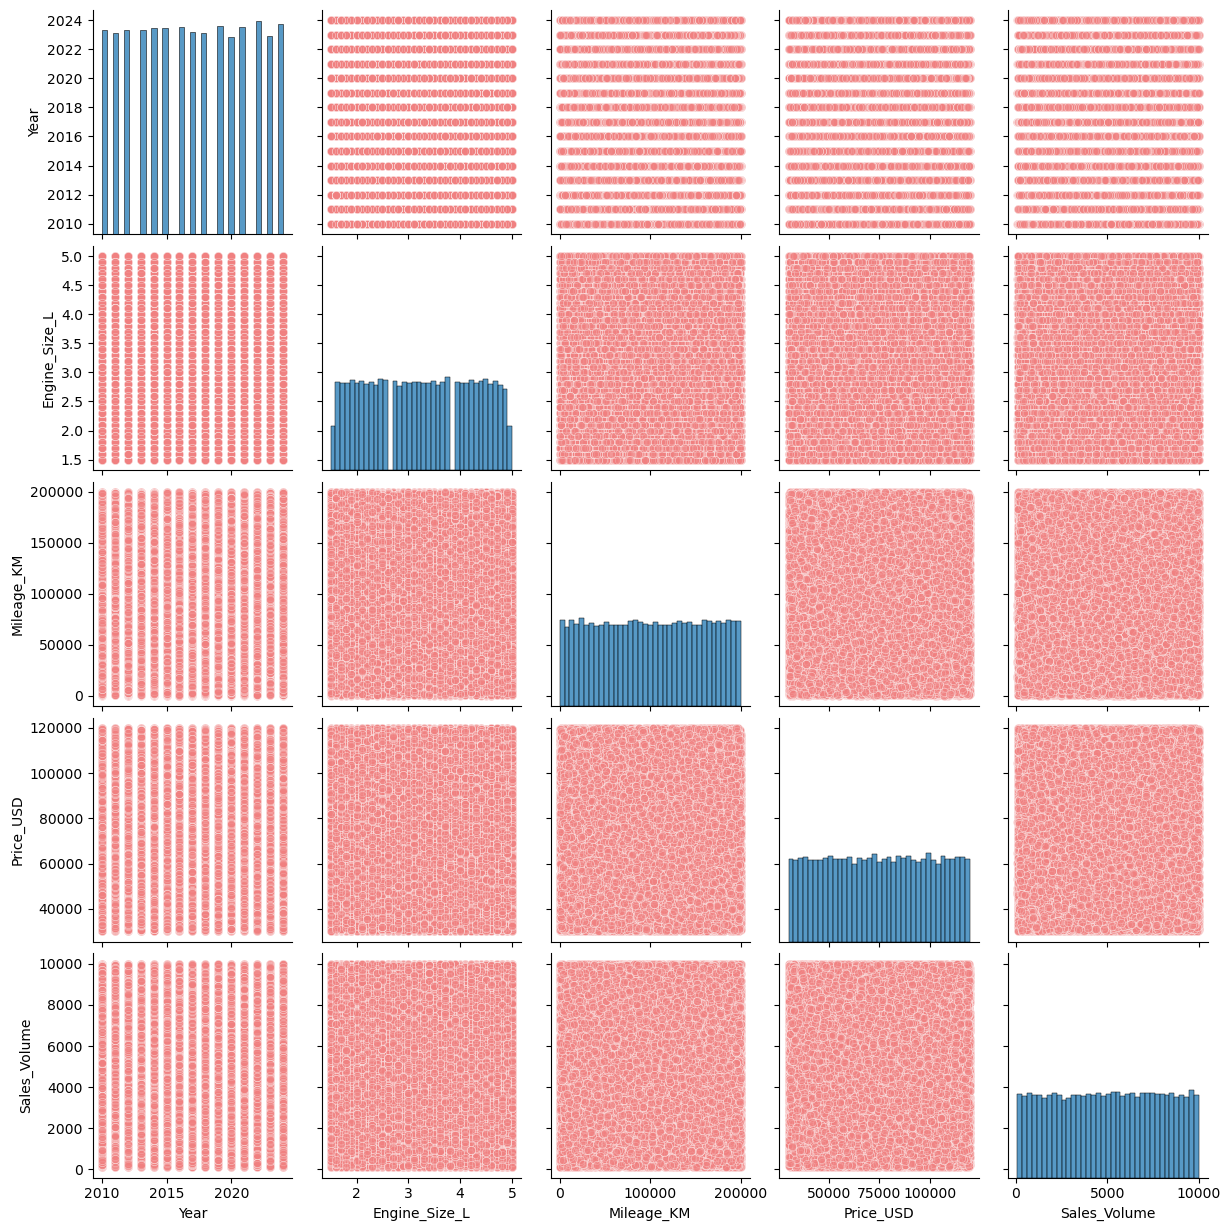

In [20]:
#Creamos pairplot para continuar con la exploracion
numeric_df = df.select_dtypes(include=['number'])

sns.pairplot(numeric_df, diag_kind='hist', plot_kws={'alpha':0.5, "color" : 'lightcoral'})
plt.show()

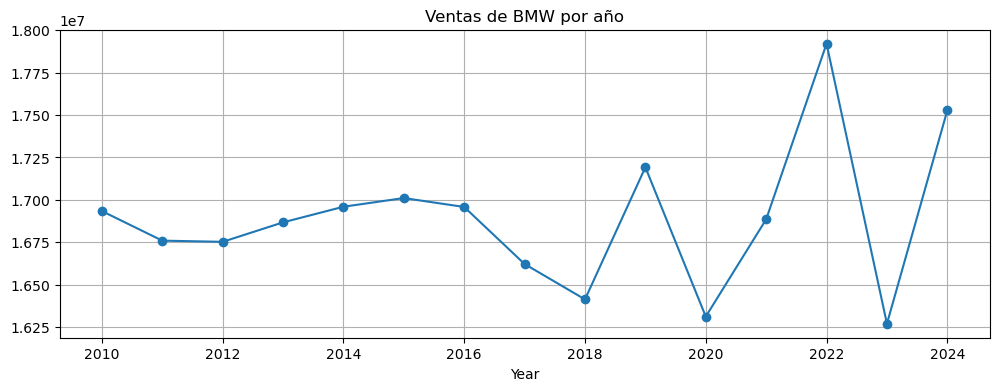

In [21]:
sales_by_year = df.groupby('Year')['Sales_Volume'].sum()

plt.figure(figsize=(12,4))
sales_by_year.plot(marker='o')
plt.title('Ventas de BMW por año')
plt.grid(True)
plt.show()

In [23]:
#Continuamos con un analisis por region
region_analysis = df.groupby('Region').agg({
    'Sales_Volume':'sum',
    'Price_USD':'mean'
}).sort_values('Sales_Volume', ascending=False)
region_analysis

,Sales_Volume,Price_USD
Region,,
Asia,42974277,75554.925006
Europe,42555138,74988.356851
North America,42402629,75070.054709
Middle East,42326620,74726.788487
Africa,41565252,74885.771598
South America,41551818,74973.598837


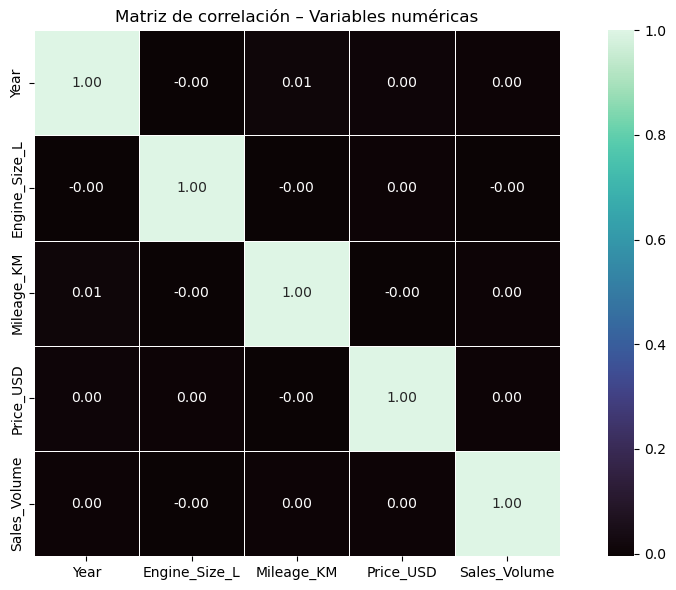

In [25]:
numeric_df = df.select_dtypes(include='number')

# Calcular correlación
corr = numeric_df.corr()

# Graficar
plt.figure(figsize=(10,6))
sns.heatmap(
    corr,
    annot=True,       
    fmt=".2f",         
    cmap="mako",   
    linewidths=0.5,    
    square=True
)

plt.title("Matriz de correlación – Variables numéricas")
plt.tight_layout()
plt.show()

En busca de los INSIGHTS

In [28]:
#Cual es el modelo con mejores ventas de BMW?
avg_sales_by_model = df.groupby('Model')['Sales_Volume'].mean().reset_index()

highest_avg_model = avg_sales_by_model.loc[avg_sales_by_model['Sales_Volume'].idxmax()]

print('Modelo de BMW con mejores ventas en promedio:')
print(highest_avg_model)

Modelo de BMW con mejores ventas en promedio:
Model                    X1
Sales_Volume    5121.676149
Name: 5, dtype: object


Aqui observamos que en general el modelo con mejores ventas de BMW es el X1.

In [31]:
#Cual es el modelo con peores ventas de BMW?
lowest_avg_model = avg_sales_by_model.loc[avg_sales_by_model['Sales_Volume'].idxmin()]

print('Modelo de BMW con peores ventas en promedio:')
print(lowest_avg_model)

Modelo de BMW con peores ventas en promedio:
Model                    i3
Sales_Volume    5009.495236
Name: 9, dtype: object


Aqui observamos que el modelo con peores ventas de BMW es el i3 (No es un fracaso en ningun aspecto).

<function matplotlib.pyplot.show(close=None, block=None)>

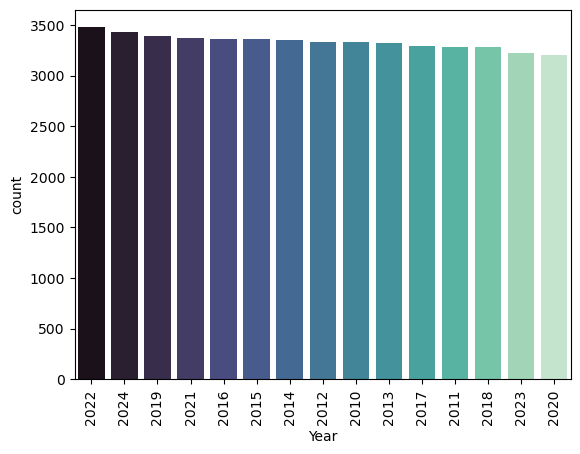

In [33]:
#Cual ha sido el año con mejores ventas?
sns.countplot(x='Year', data=df, order=df['Year'].value_counts().index, palette = 'mako')

plt.xticks(fontsize=10, rotation = 'vertical')
plt.show

Observbamos que en los ultimos años el pico de ventas ocurrio en 2022. 
No es de sorprender que el año 2020 fuese el que ha tenido las ventas mas bajas en 15 años.

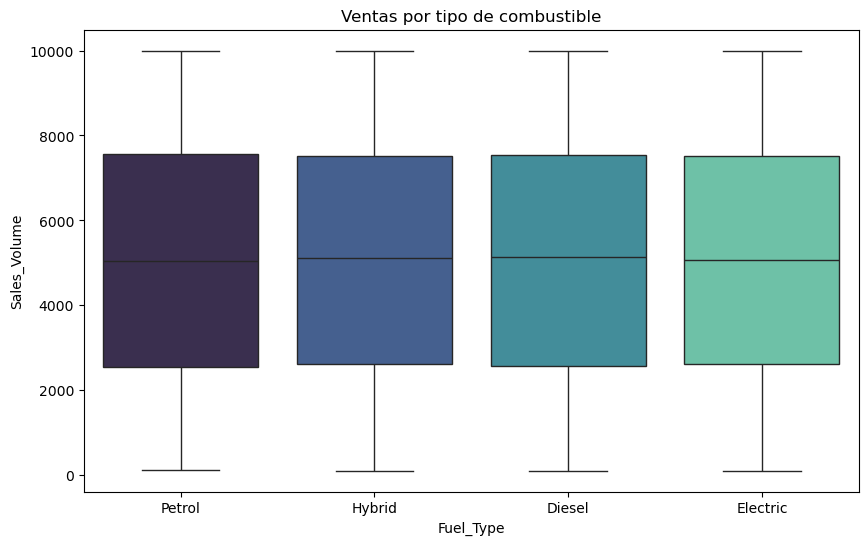

In [35]:
#Como cambian las ventas dependiendo el tipo de ventas?
plt.figure(figsize=(10,6))
sns.boxplot(data = df, x= "Fuel_Type", y= 'Sales_Volume', palette = 'mako')
plt.title('Ventas por tipo de combustible')
plt.show()

Dado que este dataset fue originado de manera artificial, estos boxplot no nos sirven de nada.

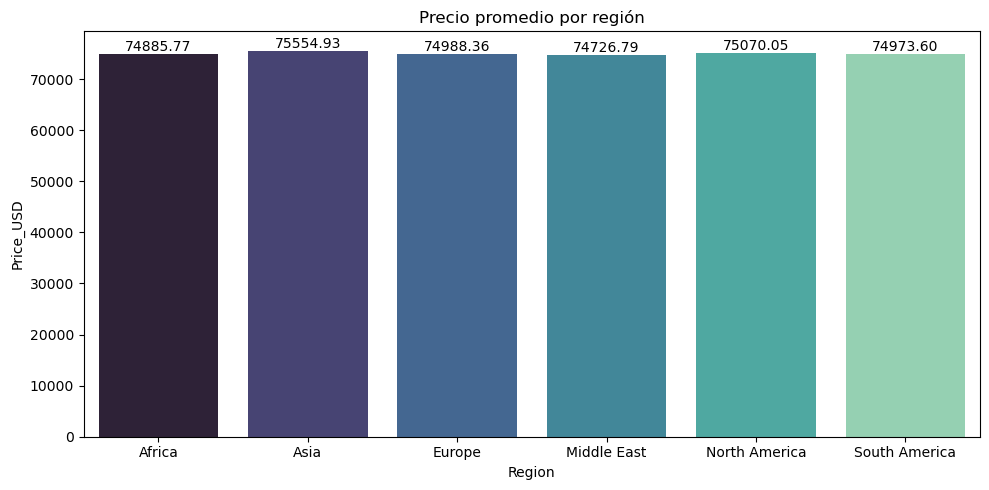

In [40]:
#Cual es el precio promedio de los vehiculos por region?
region_price = df.groupby('Region')['Price_USD'].mean().reset_index()

plt.figure(figsize=(10,5))
ax = sns.barplot(data=region_price, x='Region', y='Price_USD', palette='mako')

# Añadir etiquetas encima de cada barra
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.2f'),   # formato con 2 decimales
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10
    )

plt.title('Precio promedio por región')
plt.tight_layout()
plt.show()

Observamos que en medio oriente los precios son ligeramente mas baj

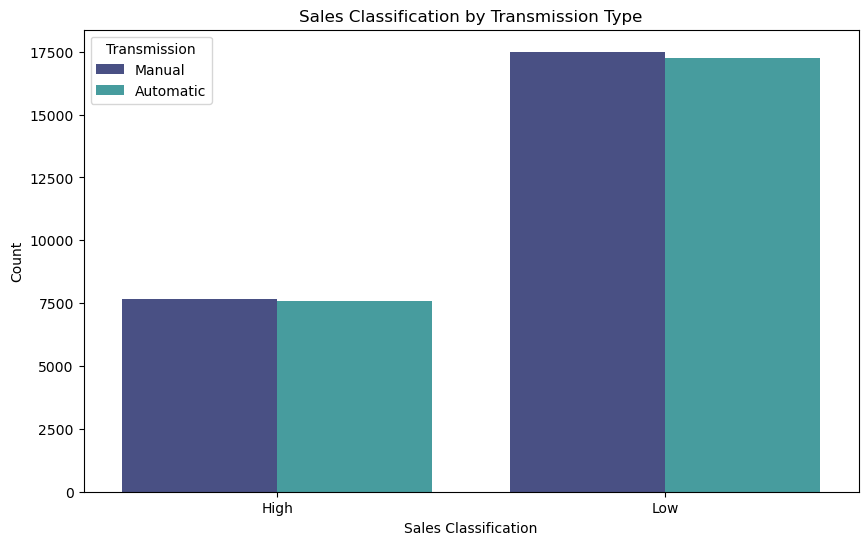

In [260]:
#Cual es la distribucion de ventas por el tipo de transmision?
plt.figure(figsize=(10, 6))
sns.countplot(data=df, palette= 'mako', x='Sales_Classification', hue='Transmission')
plt.title('Sales Classification by Transmission Type')
plt.xlabel('Sales Classification')
plt.ylabel('Count')
plt.show()

In [262]:
df.to_csv("bmw_clean.csv", index=False)